In [3]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_pickle('tesla_clean.pkl')
df.reset_index(inplace=True)

In [9]:
# remove stop words that are frequently occuring but not adding value to the topic models
stop = ['tesla', 'not', 'would', 'like', 'do', 'can', 'be']
df['Discussion_Clean'] = df['Discussion_Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [8]:
c_vec = CountVectorizer(ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['Discussion_Clean'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [1]:
plt.figure(figsize=(8,8))
sns.barplot(data=df_ngram.head(15), y='bigram', x='frequency', color='dimgray')
plt.title('Top 15 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()

NameError: name 'plt' is not defined

## Topic Modeling

In [19]:
# Term Frequency, Inverse Document Frequency Initialization.
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
lda = LatentDirichletAllocation(n_components=8, random_state=44)
pipe = make_pipeline(tfidf_vectorizer, lda)

In [20]:
def plot_top_words(model, feature_names, n_top_words, title, plot_name='img.jpg'):
    fig, axes = plt.subplots(4, 2, figsize=(9, 14), sharex=False)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        c = ['#8C2769', '#EDC2F2', '#238C8C', '#A3A656', '#F26457']
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='#8C2769')
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.tight_layout()
    plt.savefig(plot_name, dpi=300)
    plt.show()

In [21]:
# remove stop words that are frequently occuring but not adding value to the topic models
stop = ['thank', 'lol', 'yes', 'nope', 'get', 'go', 'one', 'see', 'haha', 'nice', 'flag', 'spam', 'shit', 'here', 'look', 'use', 'good', 'say', 'think', 'know', 'nah', 'ah', 'time']
df['Discussion_Clean'] = df['Discussion_Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

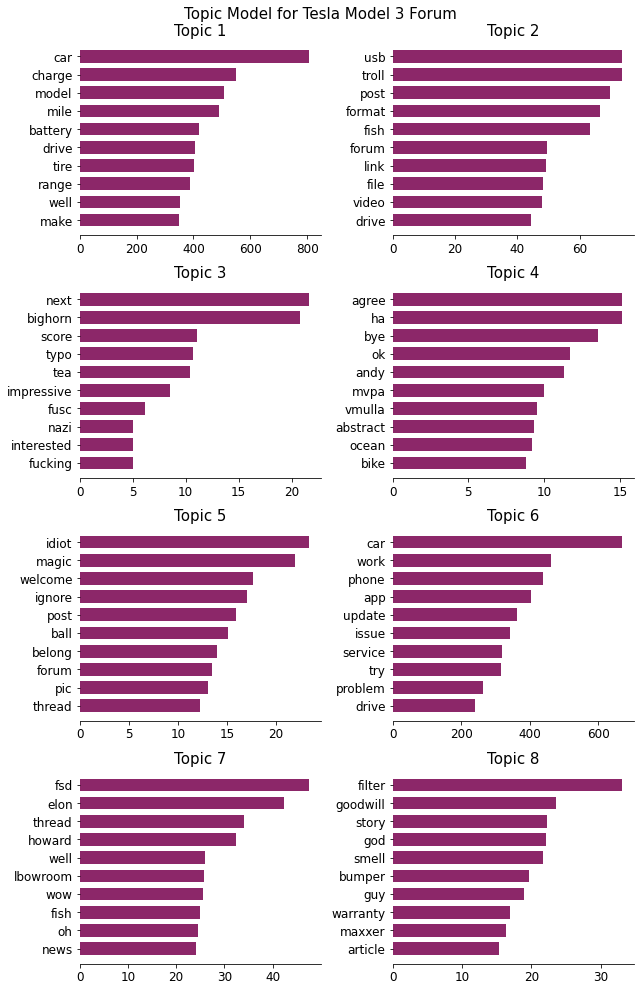

In [22]:
pipe.fit(df['Discussion_Clean'])
plot_top_words(lda, tfidf_vectorizer.get_feature_names_out(), 10, "Topic Model for Tesla Model 3 Forum", 'topic_model.jpg')